In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
from torch.linalg import norm
from dataset import AdSBHDataset
from model import AdSBHNet
from constants import dreal, dcomplex

: 

coef = 1.01


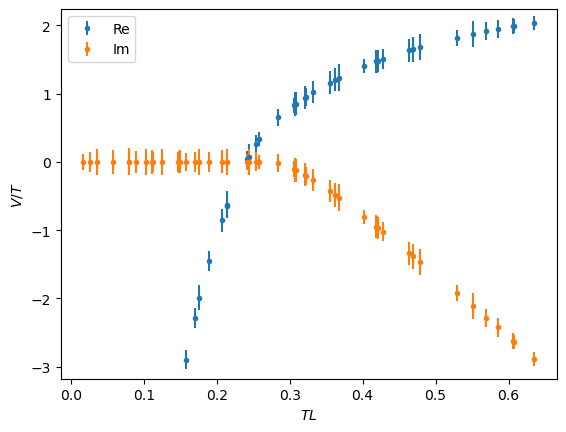

In [2]:
dataset = AdSBHDataset(N=50, threshold=0.0, coef=1.01)#=npr.uniform(0.5, 2))
plt.errorbar(dataset.L.numpy(), dataset.V.real.numpy(), yerr=dataset.sigma.real.numpy(), label='Re', fmt='.')
plt.errorbar(dataset.L.numpy(), dataset.V.imag.numpy(), yerr=dataset.sigma.imag.numpy(), label='Im', fmt='.')
plt.xlabel(f'$T L$')
plt.ylabel(f'$V/T$')
plt.ylim(1.1*dataset.V.imag.min().item(), 1.1*dataset.V.real.max().item())
plt.legend()
print(f'coef = {dataset.coef}')

## Consistency check
Learnable parameters set to zero (standard BH).

Parameter containing:
tensor(0.0100, dtype=torch.float64, requires_grad=True)


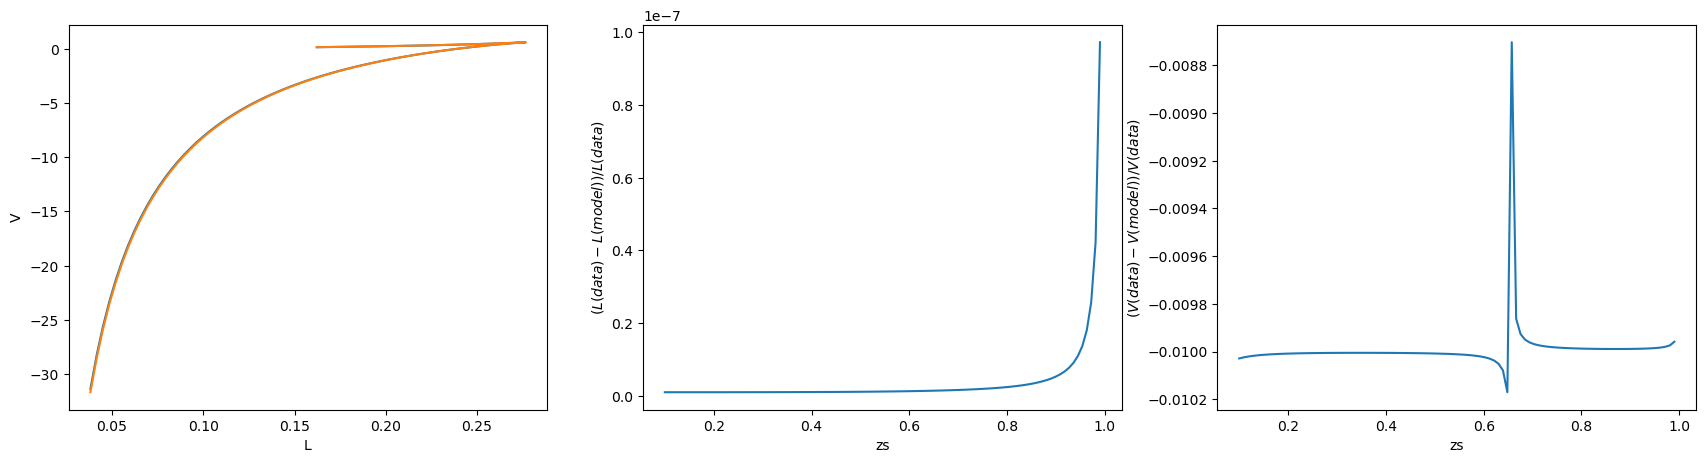

In [3]:
model = AdSBHNet(N=4)
model.a = nn.Parameter(torch.tensor([0.0], dtype=dreal))
model.b = nn.Parameter(torch.tensor([0.0], dtype=dreal))
model.logcoef = nn.Parameter(torch.tensor(dataset.coef, dtype=dreal).log())
print(model.logcoef)
zs = np.linspace(0.1, 0.99, 100)
d_L = np.array([dataset.integrate_L(z).real for z in zs])
d_V = np.array([dataset.integrate_V(z).real for z in zs])
m_L = np.array([model.integrate_L(z).real.item() for z in zs])
m_V = np.array([model.integrate_V(z).real.item() for z in zs])
fig, axs = plt.subplots(1, 3, figsize=(21, 5))
axs[0].plot(d_L, d_V)
axs[0].plot(m_L, m_V)
axs[0].set_xlabel('L')
axs[0].set_ylabel('V')
axs[1].plot(zs, (d_L-m_L)/d_L)
axs[1].set_xlabel('zs')
axs[1].set_ylabel(r'$(L(data)-L(model))/L(data)$')
axs[2].plot(zs, (d_V-m_V)/d_V)
axs[2].set_xlabel('zs')
axs[2].set_ylabel(r'$(V(data)-V(model))/V(data)$');

Agreement between dataset and model is reasonable with zero parameters. How about with some random parameters?

In [5]:
zsTest = [complex(0.142113675528766,0.3012588340796074), complex(0.0558177255520369,1.5070951885336492), complex(1.9952882318145342,0.6687418969501766), complex(0.4029404311985676,0.40642498555061213), complex(0.11935057057002396,1.7367357212681331), complex(0.99439195050115,1.0048935095851146), complex(1.429581746306488,1.698518466268971), complex(0.8901717500957749,1.0848194713430845), complex(1.4583775699101205,0.5831442903354755), complex(0.41021745342009863,0.24043993263958674)]
model = AdSBHNet(N=2)
model.a = nn.Parameter(torch.tensor([0.11287310832568255, -0.013777758591872451], dtype=dreal))
model.b = nn.Parameter(torch.tensor([0.2185139196679841, -0.06209747957865339], dtype=dreal))
model.logcoef = nn.Parameter(torch.tensor(1.0, dtype=dreal).log())
for zs in zsTest:
    print(f'{zs:.6f}\t{model.integrate_L(zs):.6f}\t{model.integrate_dL(zs):.6f}\t{model.integrate_V(zs):.6f}')

0.142114+0.301259j	0.051780+0.118372j	0.396658+0.024729j	1.437376+10.917749j
0.055818+1.507095j	-0.561293+0.783107j	0.925435+0.601301j	11.690125+9.472012j
1.995288+0.668742j	1.130194-0.098404j	0.235622-0.287987j	1.502758-7.665801j
0.402940+0.406425j	0.159925+0.168962j	0.460735+0.011481j	2.117074+4.742678j
0.119351+1.736736j	-0.653965+1.021080j	0.773934+0.719289j	13.880682+10.303258j
0.994392+1.004894j	0.628598+0.571358j	1.077318-0.254883j	8.239683-2.217160j
1.429582+1.698518j	2.260576+1.179489j	1.872445-4.303611j	14.322548-19.188689j
0.890172+1.084819j	0.525878+0.678896j	1.172805-0.099074j	9.458269-1.109696j
1.458378+0.583144j	0.852286+0.048178j	0.635995-0.382353j	2.814926-4.895166j
0.410217+0.240440j	0.162573+0.096057j	0.419013-0.013165j	-0.517857+4.025157j


Let's check that $a=b=0$ is a local minimum of the loss function

	zs = (0.8335784378207108+0j)
	diff = 4.957522380777402e-06
	init = (0.843021104237402+0j). Retrying with default init 0.5+0.5j.
ERROR:root:Newton's method failed to converge in 25 iterations for L = 0.27853158894637303
	zs = (0.8332773468586429+1.8649818337259248e-05j)
	diff = 1.4100420408159457e-05
	init = (0.5+0.5j).
	zs = (0.8368423885202256+0j)
	diff = 2.8332454352075764e-06
	init = (0.844022006828454+0j). Retrying with default init 0.5+0.5j.
ERROR:root:Newton's method failed to converge in 25 iterations for L = 0.27853158894637303
	zs = (0.833348818539764+1.3582205313463794e-05j)
	diff = 0.00019800999506741122
	init = (0.5+0.5j).
	zs = (0.8303014380417868+0j)
	diff = 0.0005784160119243209
	init = (0.8449816407110659+0j). Retrying with default init 0.5+0.5j.
	zs = (0.8303014391990522+0j)
	diff = 0.0005784159310611159
	init = (0.8449816407110656+0j). Retrying with default init 0.5+0.5j.
	zs = (0.8368423885202256+0j)
	diff = 2.8332454352075764e-06
	init = (0.844022006828454+0j). Ret

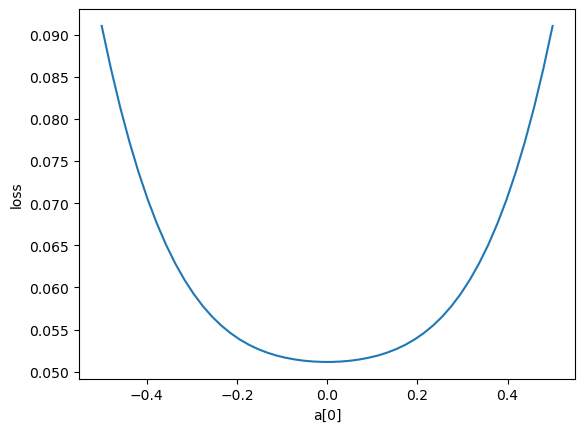

In [6]:
A = np.linspace(-0.5, 0.5, 50)
losses = []
model = AdSBHNet(N=1)
for aval in A:
    model.a = nn.Parameter(torch.tensor([aval], dtype=dreal))
    model.b = nn.Parameter(torch.tensor([0.0], dtype=dreal))
    model.logcoef = nn.Parameter(torch.tensor(dataset.coef, dtype=dreal).log())
    loss = (model(dataset.L) - dataset.V).abs().pow(2).mean()
    losses.append(loss.item())
plt.plot(A, losses)
plt.xlabel('a[0]')
plt.ylabel('loss');

Check that gradients agree with these results.

	zs = (0.8335784378207108+0j)
	diff = 4.957522380777402e-06
	init = (0.843021104237402+0j). Retrying with default init 0.5+0.5j.
ERROR:root:Newton's method failed to converge in 25 iterations for L = 0.27853158894637303
	zs = (0.8332773468586429+1.8649818337259248e-05j)
	diff = 1.4100420408159457e-05
	init = (0.5+0.5j).
	zs = (0.8368423885202256+0j)
	diff = 2.8332454352075764e-06
	init = (0.844022006828454+0j). Retrying with default init 0.5+0.5j.
ERROR:root:Newton's method failed to converge in 25 iterations for L = 0.27853158894637303
	zs = (0.833348818539764+1.3582205313463794e-05j)
	diff = 0.00019800999506741122
	init = (0.5+0.5j).
	zs = (0.8303014380417868+0j)
	diff = 0.0005784160119243209
	init = (0.8449816407110659+0j). Retrying with default init 0.5+0.5j.
	zs = (0.8303014391990522+0j)
	diff = 0.0005784159310611159
	init = (0.8449816407110656+0j). Retrying with default init 0.5+0.5j.
	zs = (0.8368423885202256+0j)
	diff = 2.8332454352075764e-06
	init = (0.844022006828454+0j). Ret

Parameter containing:
tensor(0.0100, dtype=torch.float64, requires_grad=True)


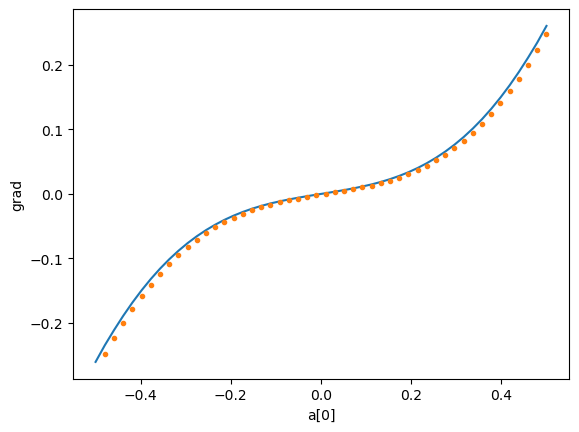

In [7]:
grads = []
model = AdSBHNet(N=1)
for aval in A:
    model.a = nn.Parameter(torch.tensor([aval], dtype=dreal))
    model.b = nn.Parameter(torch.tensor([0.0], dtype=dreal))
    model.logcoef = nn.Parameter(torch.tensor(dataset.coef, dtype=dreal).log())
    model.zero_grad()
    loss = (model(dataset.L) - dataset.V).abs().pow(2).mean()
    loss.backward()
    grads.append(model.a.grad[0].item())
plt.plot(A, grads)
plt.plot(A[1:], (np.array(losses[1:])-np.array(losses[:-1]))/(A[1]-A[0]), '.')
plt.xlabel('a[0]')
plt.ylabel('grad');
print(model.logcoef)

Do the same check w.r.t. $b$.

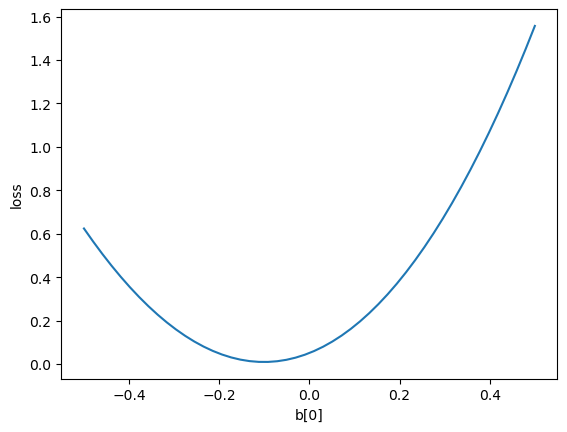

In [10]:
B = np.linspace(-0.5, 0.5, 50)
losses = []
model = AdSBHNet(N=1)
for bval in B:
    model.a = nn.Parameter(torch.tensor([0.0], dtype=dreal))
    model.b = nn.Parameter(torch.tensor([bval], dtype=dreal))
    model.logcoef = nn.Parameter(torch.tensor(dataset.coef, dtype=dreal).log())
    loss = (model(dataset.L) - dataset.V).abs().pow(2).mean()
    losses.append(loss.item())
plt.plot(B, losses)
plt.xlabel('b[0]')
plt.ylabel('loss');

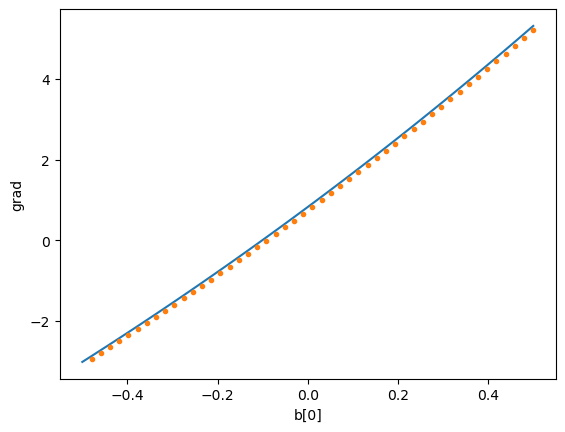

In [9]:
grads = []
model = AdSBHNet(N=1)
for bval in B:
    model.a = nn.Parameter(torch.tensor([0.0], dtype=dreal))
    model.b = nn.Parameter(torch.tensor([bval], dtype=dreal))
    model.logcoef = nn.Parameter(torch.tensor(dataset.coef, dtype=dreal).log())
    model.zero_grad()
    loss = (model(dataset.L) - dataset.V).abs().pow(2).mean()
    loss.backward()
    grads.append(model.b.grad[0].item())
plt.plot(B, grads)
plt.plot(B[1:], (np.array(losses[1:])-np.array(losses[:-1]))/(B[1]-B[0]), '.')
plt.xlabel('b[0]')
plt.ylabel('grad');

## Training

In [11]:
model = AdSBHNet(N=4, std=0.5)
#print(list(model.parameters()))
loader = torch.utils.data.DataLoader(dataset=dataset, batch_size=10)
optimizer = torch.optim.Adam(model.parameters(), lr=0.05)
epochs = 100
a_vals, b_vals, coef_vals = [model.a.detach().numpy().copy()], [model.b.detach().numpy().copy()], [model.logcoef.exp().item()]
eps = 0.01

z = np.linspace(0, 0.999, 50)
fzInit = model.eval_f(z).detach().numpy()
gzInit = model.eval_g(z).detach().numpy()
fz0 = 1-z**4
gz0 = 1/fz0

try:
    for epoch in range(epochs):
        for L, V, sigma in loader:
            optimizer.zero_grad()
            V_pred = model(L)
            V_diff = V_pred - V
            loss = torch.mean(V_diff.real**2 / sigma.real) + torch.mean(V_diff.imag**2 / sigma.imag)
            loss.backward()
            a_vals.append(model.a.detach().numpy().copy())
            b_vals.append(model.b.detach().numpy().copy())
            coef_vals.append(model.logcoef.exp().item())
            optimizer.step()
        print(f'epoch={epoch:2d}, loss={loss.item():0.6f}')
except KeyboardInterrupt:
    print('Stopping.')

fz = model.eval_f(z).detach().numpy()
gz = model.eval_g(z).detach().numpy()

	zs = (1.2113502125638027+0.20578985095079058j)
	diff = 2.049344303297432e-08
	init = (1.1993513472638004+0.21053530052254862j). Retrying with default init 0.5+0.5j.
ERROR:root:Newton's method failed to converge in 25 iterations for L = 0.5476431491398963
	zs = (1.2113503540739214+0.2057899616715254j)
	diff = 2.0410375540424438e-07
	init = (0.5+0.5j).
	zs = (1.222558165585016+0.20096996435436146j)
	diff = 4.209232790489045e-08
	init = (1.2113503540739214+0.2057899616715254j). Retrying with default init 0.5+0.5j.
ERROR:root:Newton's method failed to converge in 25 iterations for L = 0.5622353056192545
	zs = (1.2225584519867434+0.20096971234886657j)
	diff = 4.624458838066164e-07
	init = (0.5+0.5j).
	zs = (1.233058106704357+0.1961398356399701j)
	diff = 7.889245591268206e-08
	init = (1.2225584519867434+0.20096971234886657j). Retrying with default init 0.5+0.5j.
ERROR:root:Newton's method failed to converge in 25 iterations for L = 0.5768274620986127
	zs = (1.233057840784555+0.1961391361367

Stopping.


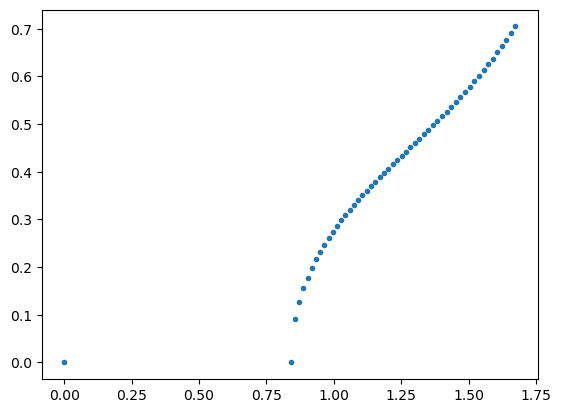

In [8]:
plt.plot([np.real(x) for x in model.curve_zs], [np.imag(x) for x in model.curve_zs], '.')

In [ ]:
plt.plot(model.curve_L, [np.real(x) for x in model.curve_zs])
plt.plot(model.curve_L, [np.imag(x) for x in model.curve_zs])

AttributeError: 'AdSBHNet' object has no attribute 'curve_zs'

[-1.66158973  1.31914889]
[ 0.61279398 -0.67856852]
0.9469576502140081


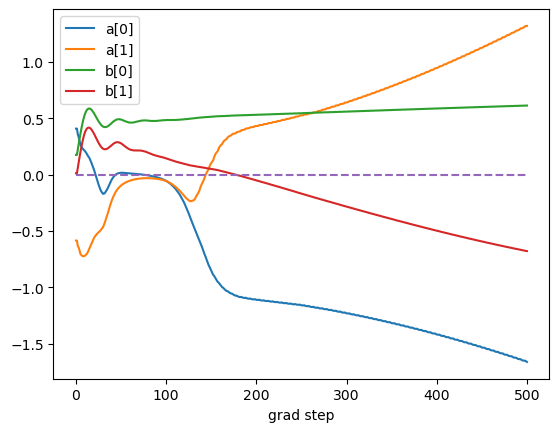

In [ ]:
for i in range(len(a_vals[0])):
    plt.plot([a[i] for a in a_vals], label=f'a[{i}]')
for i in range(len(a_vals[0])):
    plt.plot([b[i] for b in b_vals], label=f'b[{i}]')
plt.plot([0]*len(a_vals), '--')
plt.xlabel('grad step')
plt.legend();
print(a_vals[-1])
print(b_vals[-1])
print(coef_vals[-1])

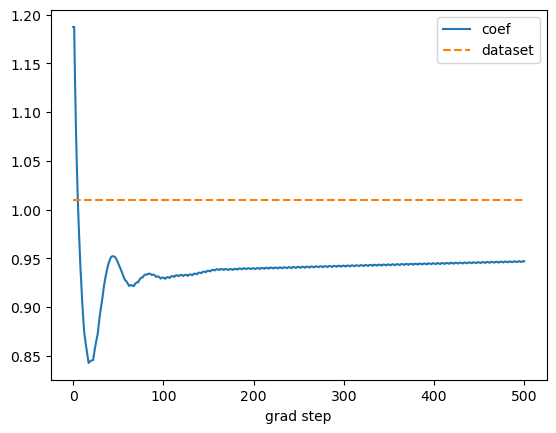

In [ ]:
plt.plot(coef_vals, label='coef')
plt.plot([dataset.coef]*len(coef_vals), '--', label='dataset')
plt.xlabel('grad step')
plt.legend();

NameError: name 'z' is not defined

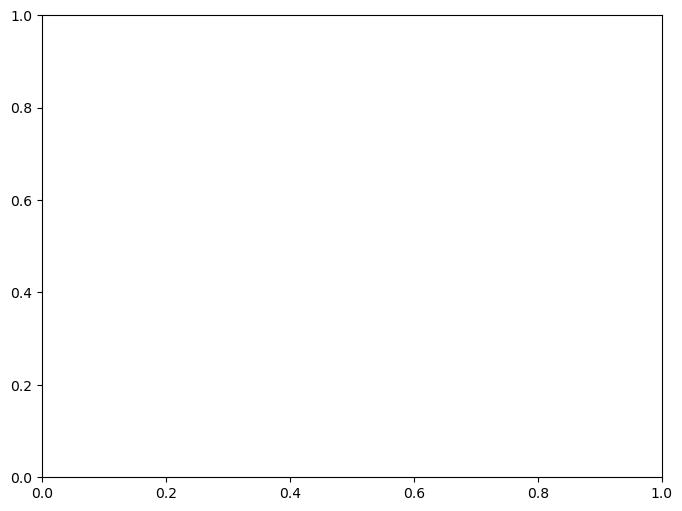

In [ ]:
plt.subplots(figsize=(8, 6))
plt.plot(z, fz0, '1', label='BH')
plt.plot(z, fz, label='Net')
plt.plot(z, fzInit, '--', label='Init')
plt.title(f'$f(z)$')
plt.xlabel(f'$z$')
plt.legend();

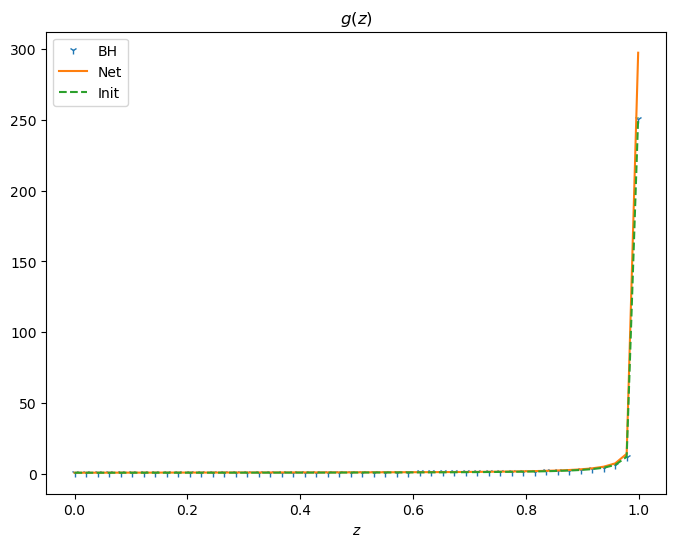

In [ ]:
plt.subplots(figsize=(8, 6))
plt.plot(z, gz0, '1', label='BH')
plt.plot(z, gz, label='Net')
plt.plot(z, gzInit, '--', label='Init')
plt.title(f'$g(z)$')
plt.xlabel(f'$z$')
plt.legend();

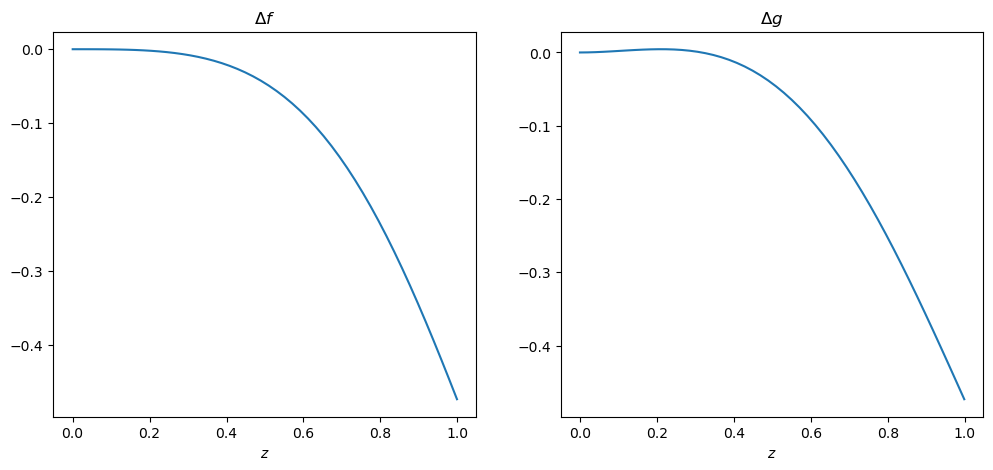

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].plot(z, (fz-fz0)/fz0)
axs[0].set_title(f'$\Delta f$')
axs[0].set_xlabel(f'$z$')
axs[1].plot(z, (gz-gz0)/gz0)
axs[1].set_title(f'$\Delta g$')
axs[1].set_xlabel(f'$z$');

In [ ]:
plt.plot([np.real(model.integrate_L(zs).detach().numpy()) for zs in np.linspace(0.1,0.99,50)],[np.real(model.integrate_V(zs).detach().numpy()) for zs in np.linspace(0.2,0.99,50)])
plt.plot([np.real(model.integrate_L(model.curve_zs[i]).detach().numpy()) for i in range(1,len(model.curve_zs))],[np.real(model.integrate_V(model.curve_zs[i]).detach().numpy()) for i in range(1,len(model.curve_zs))])
plt.ylabel('V')
plt.xlabel('L')